In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../inputs/input13.txt', 'r') as f:
    strings = f.readlines()

In [3]:
coord = [(int(line.strip().split(',')[0]), int(line.strip().split(',')[1])) for line in strings if ',' in line]
folds = [{'type': string.split('=')[0][-1], 'line': int(string.split('=')[-1])} for string in strings if 'fold' in string]

In [4]:
max_x, max_y = max(map(lambda x: x[0], coord)), max(map(lambda x: x[1], coord))

In [6]:
grid = np.zeros((max_x + 1, max_y + 1))
grid[tuple(zip(*coord))] = 1

In [7]:
def fold(grid, type=None, line=None):
    if type == 'x':
        return grid[:line, :] + np.flip(grid[line+1:, :], axis=0)
    elif type == 'y':
        return grid[:, :line] + np.flip(grid[:, line+1:], axis=1)
    else:
        raise ValueError('no good type')

In [9]:
# part 1
new_grid = fold(grid, **folds[0])
len(np.argwhere(new_grid > 0))

807

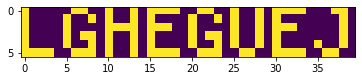

In [10]:
# part 2
for fold_ins in folds:
    grid = fold(grid, **fold_ins)
plt.imshow(grid.T>0)